In [1]:
from src.FLM_driver import FLM

meteor=FLM()

2023-05-12 13:38:07,965 DEBUG:	COMLOG_SERVER: light_set_channel()	requested channel: reflection
2023-05-12 13:38:07,972 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.010006162432432433 s
2023-05-12 13:38:07,985 DEBUG:	COMLOG_SERVER: __init__()	METEOR connection finished!


In [6]:
meteor.disconnect()
del meteor

2023-05-12 13:34:56,109 DEBUG:	COMLOG_SERVER: disconnect()	Disconnected gracefully, no need to restart the XT-server!


In [ ]:
#meteor.autofocus()
channels = ['reflection','uv','green', 'orange', 'red', 'far_red']
z_stack={
    'chan': channels,
    'int': [4] + [10] * (channels.__len__() - 1),
    'exp': [0.01] + [0.3] * (channels.__len__() - 1)
}

stack =meteor.start_acquisition(15e-6,3e-6,filters=z_stack['chan'],intensity=z_stack['int'],exposure=z_stack['exp'], focus_pos={'z':10.4e-3})

In [ ]:
## Test performace in acquisition loop

# import numpy as np
# import time
# toc = []
# for i in range(30):
#     meteor.cam_dev.start_generate()
#     meteor.cam_dev.ResetCaptureStatus()
#     img= meteor.cam_dev.data.get(asap=False)
#     meteor.cam_dev.stop_generate()
#     tic = time.time()
#     img2 = np.transpose(img).astype(np.uint16)
#     toc2 = float(time.time() - tic)
#     toc.append(toc2)


# print('Elapsed time: mean:{}, std: {}'.format(np.mean(toc),np.std(toc)))

Elapsed time: mean:0.0012964646021525065, std: 0.00033693679178177553


In [ ]:
# Camera testing for this STUPID error!
# tic = time.time()
# meteor.cam_dev.start_generate()
# meteor.cam_dev.ResetCaptureStatus()
# test_img_old= meteor.cam_dev.data.get(asap=False)
# meteor.cam_dev.stop_generate()

# meteor.cam_dev.start_generate()
# meteor.focus_set_rel({'z': -0.1e-3})
# meteor.cam_dev.ResetCaptureStatus()
# test_img = meteor.cam_dev.data.get(asap=False)
# meteor.cam_dev.stop_generate()
# toc = time.time() - tic

# print('Current ecapture status: {}'.format(meteor.cam_dev.GetCaptureStatus()))
# print('Elapsed time: {}'.format(toc))

# plt.imshow(test_img_old)
# plt.show()
# plt.imshow(test_img)
# plt.show()


# for i in range(20):
#     if i == 10:
#         meteor.focus_set_rel({'z': 0.1e-3})
#     meteor.cam_dev.start_generate()
#     meteor.cam_dev.ResetCaptureStatus()
#     test_img = meteor.cam_dev.data.get(asap=True)
#     meteor.cam_dev.stop_generate()

#     print(i)
#     plt.imshow(test_img)
#     plt.show()


In [4]:
import numpy as np
import cv2


def adjust_brightness_contrast(stack):
    """
    Adjusts the brightness and contrast of a TZCXY stack for every channel using CLAHE.

    Args:
        stack (numpy.ndarray): Input stack with shape (T, Z, C, X, Y).

    Returns:
        numpy.ndarray: Adjusted stack with the same shape as the input stack.
    """
    adjusted_stack = np.copy(stack)  # Create a copy of the input stack

    # Iterate over each channel in the stack
    for channel in range(stack.shape[2]):
        # Create a CLAHE object
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

        # Iterate over each frame in the stack
        for slice in range(stack.shape[0]):
            # Apply CLAHE to adjust brightness and contrast
            adjusted_stack[0, slice, channel, :, :] = clahe.apply(stack[0, slice, channel, :, :])

    return adjusted_stack

In [18]:
#{'yellow': 4,'UV': 3, 'cyan': 2, 'green': 1, 'red': 0}

meteor.light_set_source('green',0)

()

2023-05-12 14:05:28,293 INFO:	COMLOG_SERVER: autofocus()	Starting autofocus.
2023-05-12 14:05:28,296 DEBUG:	COMLOG_SERVER: light_set_channel()	requested channel: reflection
2023-05-12 14:05:32,701 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.010006162432432433 s
2023-05-12 14:05:47,918 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Max Score: 363.1772834701413
2023-05-12 14:05:47,921 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Index of max focus Value: 7
2023-05-12 14:05:48,320 DEBUG:	COMLOG_SERVER: autofocus()	New Focus position: {'z': 0.0106}
2023-05-12 14:05:48,324 DEBUG:	COMLOG_SERVER: light_set_channel()	requested channel: reflection
2023-05-12 14:05:48,331 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.010006162432432433 s
2023-05-12 14:06:08,136 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Max Score: 362.6965454999824
2023-05-12 14:06:08,137 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Index of max focus Value: 19
2023-05-12 14:06:08,326 

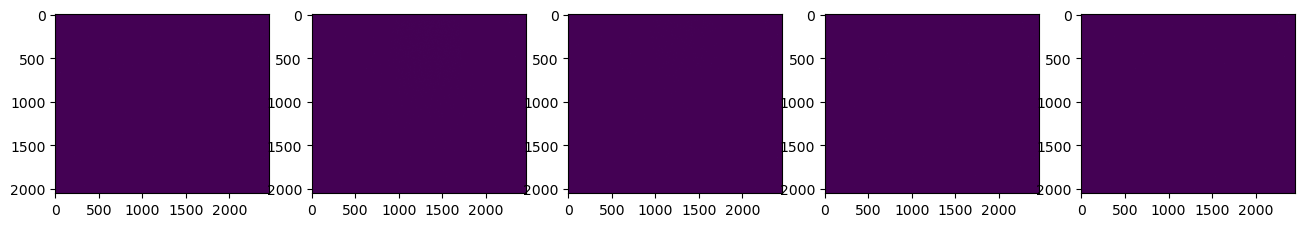

2023-05-12 14:06:37,908 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: empty / LED: yellow, mean intensity: 136.73001575538632
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_06_em_empty_ex_yellow.tiff
2023-05-12 14:06:42,939 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: empty / LED: UV, mean intensity: 134.9719701607097
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_06_em_empty_ex_UV.tiff
2023-05-12 14:06:47,738 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: empty / LED: cyan, mean intensity: 135.89285504727408
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_06_em_empty_ex_cyan.tiff
2023-05-12 14:06:52,556 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: empty / LED: green, mean intensity: 136.58823749797804
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_06_em_empty_ex_green.tiff
2023-05-12 14:06:57,339 ERROR:	COMLOG_SERVER: c

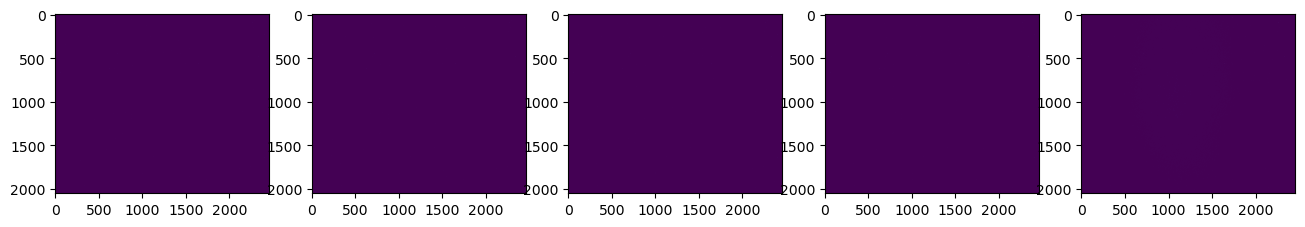

2023-05-12 14:07:05,903 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: orange / LED: yellow, mean intensity: 672.2510857102532
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_07_em_orange_ex_yellow.tiff
2023-05-12 14:07:10,925 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: orange / LED: UV, mean intensity: 154.06562154087203
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_07_em_orange_ex_UV.tiff
2023-05-12 14:07:15,733 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: orange / LED: cyan, mean intensity: 158.5187774153237
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_07_em_orange_ex_cyan.tiff
2023-05-12 14:07:20,531 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: orange / LED: green, mean intensity: 671.1908241327798
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_07_em_orange_ex_green.tiff
2023-05-12 14:07:25,333 ERROR:	COMLOG_SER

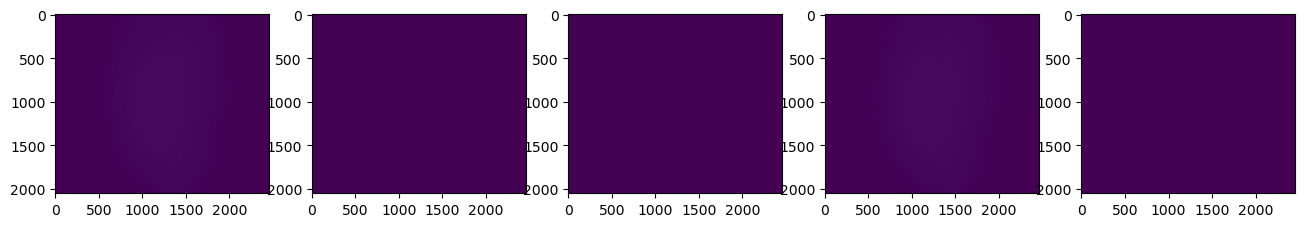

2023-05-12 14:07:33,931 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: red / LED: yellow, mean intensity: 57679.51708710104
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_07_em_red_ex_yellow.tiff
2023-05-12 14:07:38,963 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: red / LED: UV, mean intensity: 37425.0426495612
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_07_em_red_ex_UV.tiff
2023-05-12 14:07:43,742 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: red / LED: cyan, mean intensity: 52452.81406780763
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_07_em_red_ex_cyan.tiff
2023-05-12 14:07:48,539 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.7998130813513513 s
Filter: red / LED: green, mean intensity: 57668.64646522714
/home/meteor/dev/SerialFIB-iFLM/23_05_1214_07_em_red_ex_green.tiff
2023-05-12 14:07:53,328 ERROR:	COMLOG_SERVER: cam_set_exposure()	Me

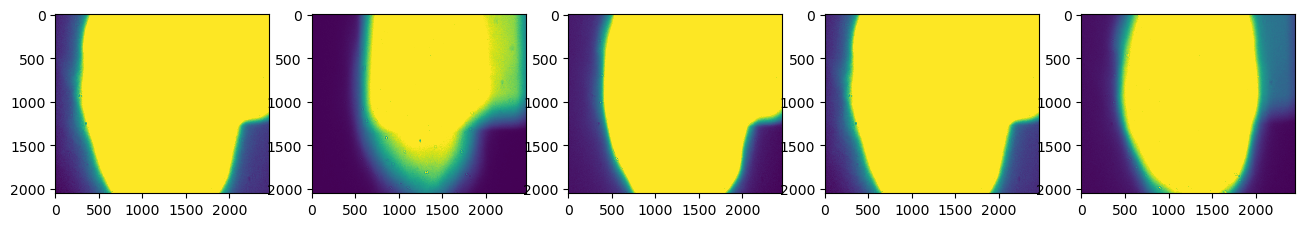

()

In [13]:

import matplotlib.pyplot as plt
import numpy as np
import os, datetime

SUPPRESS_AUTOFOCUS = True
FLUO_INTENSITY = 50
EXPOSURE = 0.8

step = 3e-6
slices = int(3)

ex_channels = ['yellow','UV','cyan', 'green', 'red']
em_channels = ['green', 'empty', 'orange', 'red']

meteor.autofocus(initial_focus={'z':10.5e-3})
for i in range(len(em_channels)):
    fig, ax = plt.subplots(1,len(ex_channels),figsize=(16,9))
    meteor.light_set_filter_wheel(em_channels[i])
    for j in range(len(ex_channels)):
        meteor.light_set_source(ex_channels[j],FLUO_INTENSITY)
        meteor.cam_set_exposure(EXPOSURE)

        stack = meteor.get_formatted_stack(step,slices,focusPos={'z':10.648e-3},format="TZCYX", FINISH_IN_SAFE=False)

        print('Filter: {} / LED: {}, mean intensity: {}'.format(em_channels[i], ex_channels[j], np.mean(stack[0,1,0,:,:])))
        ax[j].imshow(stack[0,1,0,:,:])
        #fig.show()

        SAVE_STACK_NAME = os.path.join(os.getcwd(), datetime.datetime.now().strftime("%y_%m_%d%H_%M") +
                                                        "_em_{:s}_ex_{:s}.tiff".format(em_channels[i], ex_channels[j]))
        meteor.save_stack_imagej(stack,SAVE_STACK_NAME)
    plt.show()
meteor.focus_goto_safe()


In [ ]:
z_stack={
    'chan': channels,
    'int': [4] + [10] * (channels.__len__() - 1),
    'exp': [0.01] + [0.3] * (channels.__len__() - 1)
}

stack =meteor.start_acquisition(15e-6,3e-6,filters=z_stack['chan'],intensity=z_stack['int'],exposure=z_stack['exp'], focus_pos={'z':10.648e-3})

reflection


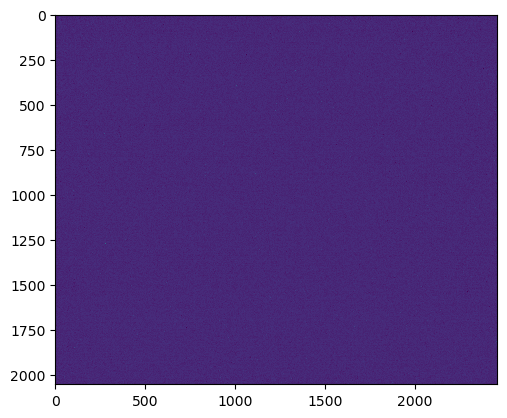

uv


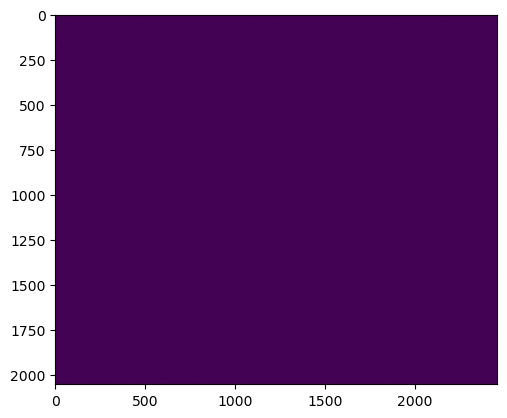

green


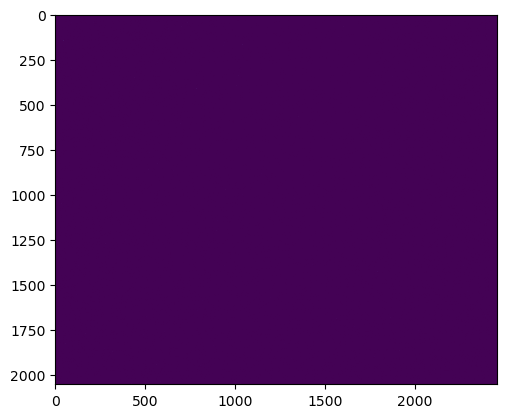

orange


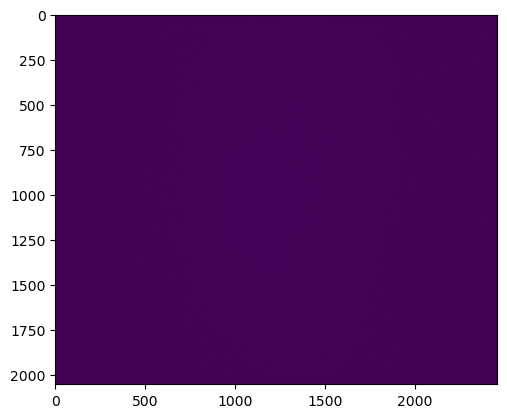

red


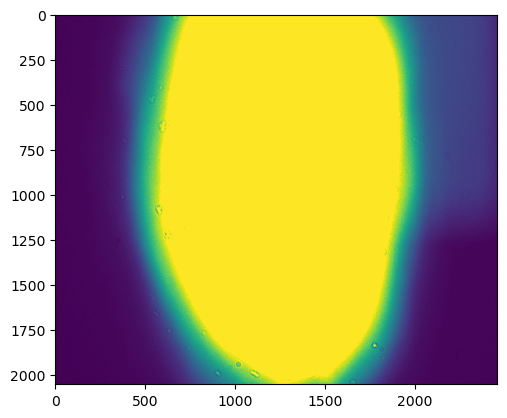

far_red


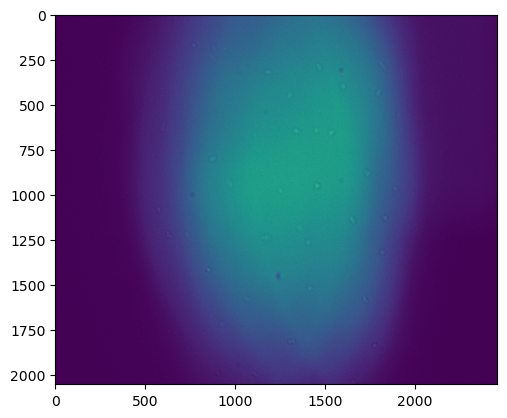

In [5]:
import matplotlib.pyplot as plt
import numpy as np

z_stack_adj = adjust_brightness_contrast(stack)

for i in range(0,stack.shape[2],1):
    print(z_stack['chan'][i])
    plt.imshow(z_stack_adj[0,3,i,:,:])
    plt.show()